## Loading Libraries

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import plotly.graph_objs as go #visualization
import plotly.offline as py #visualization

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
#print(os.listdir("../input")

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# Import different models 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Scoring function
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
from keras.layers import BatchNormalization

## Loading Data

In [5]:
data_set = pd.read_csv('D:/Behzad/Machine Learning/Maktabkhooneh/Session 20/Project 2 - Churn modelling/Churn.csv')

In [6]:
training_data = data_set.copy()

## Data Manipulation (EDA)

In [7]:
training_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
training_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
training_data.shape

(10000, 14)

In [10]:
# Convert all columns heading in lowercase
clean_column_name = []
columns_ = training_data.columns
for i in range(len(columns_)):
    clean_column_name.append(columns_[i].lower())
training_data.columns = clean_column_name

###### As we can see the rownumber attribute is just like a counter of records, the customerid attribute is a unique identifier for a given customer and the surname attribute enter also the profiling a customer. So we are going remove them from our dataset they don't give useful information the analysis.

In [11]:
# Drop the irrelevant columns  as shown above
training_data = training_data.drop(["rownumber", "customerid", "surname"], axis = 1)

In [12]:
#Separating churn and non churn customers
churn     = training_data[training_data["exited"] == 1]
not_churn = training_data[training_data["exited"] == 0]

In [13]:
target_col = ["exited"]
cat_cols   = training_data.nunique()[training_data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in training_data.columns if x not in cat_cols + target_col]

In [14]:
cat_cols

['geography', 'gender', 'numofproducts', 'hascrcard', 'isactivemember']

In [15]:
num_cols

['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

In [16]:
# Checking for unique value in the data attributes
training_data.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

In [17]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[:10]].describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [18]:
#Finding missing values
training_data.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

###### There is no missing value! Thanks God!

In [19]:
# Median
training_data[training_data.columns[:10]].median()

creditscore           652.000
age                    37.000
tenure                  5.000
balance             97198.540
numofproducts           1.000
hascrcard               1.000
isactivemember          1.000
estimatedsalary    100193.915
dtype: float64

In [20]:
# Mean
training_data[training_data.columns[:10]].mean()

creditscore           650.528800
age                    38.921800
tenure                  5.012800
balance             76485.889288
numofproducts           1.530200
hascrcard               0.705500
isactivemember          0.515100
estimatedsalary    100090.239881
dtype: float64

In [21]:
# Percentage per category for the target column.
percentage_labels = training_data['exited'].value_counts(normalize = True) * 100
percentage_labels

0    79.63
1    20.37
Name: exited, dtype: float64

## Visualising

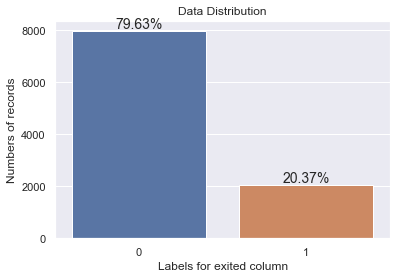

In [22]:
# Graphical representation of the target label percentage.
total_len = len(training_data['exited'])
sns.set()
sns.countplot(training_data.exited).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

### Distribution of the categorical variables

In [23]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
#for all categorical columns plot pie
#for i in cat_cols :
    #plot_pie(i)

In [24]:
# Calling the function for plotting the pie plot for geography column
plot_pie(cat_cols[0])

In [25]:
# Calling the function for plotting the pie plot for gender column
plot_pie(cat_cols[1])

In [26]:
# Calling the function for plotting the pie plot for number of products column
plot_pie(cat_cols[2])

In [27]:
# Calling the function for plotting the pie plot for has credit card column
plot_pie(cat_cols[3])

In [28]:
# Calling the function for plotting the pie plot for is active membercolumn
plot_pie(cat_cols[4])

###### The output above shows us that the among the churned customers those who are not active members have a high rate of churn with 63.9% , and active members with 36.1%. For non chun customers active members are leading with 55.5%, and non active members with 44.5%

### Distribution of the continuous variables

In [29]:
#function  for histogram for customer churn types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [30]:
# Calling the function for plotting the histogram for credit score column 
histogram(num_cols[0])

In [31]:
# Calling the function for plotting the histogram for age column 
# Pass the mouse hover the graph for more information. 
histogram(num_cols[1])

In [32]:
# Calling the function for plotting the histogram for tenure column 
histogram(num_cols[2])

In [33]:
# Calling the function for plotting the histogram for balance column 
histogram(num_cols[3])

In [34]:
# Calling the function for plotting the histogram for estimatedsalary  column 
histogram(num_cols[4])

### Correlation

In [35]:
# Get the correlation matrix of the training dataset
training_data[training_data.columns].corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

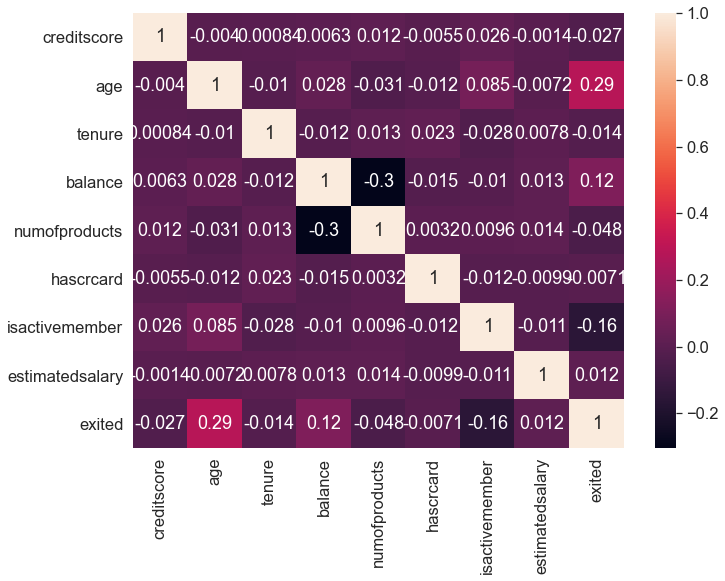

In [36]:
plt.figure(figsize=(11,8))
churn_corr = training_data.corr()
churn_corr_top = churn_corr.index
sns.heatmap(training_data[churn_corr_top].corr(), annot=True)

### Detecting and Handling Outlayers

In [37]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )

new_df = training_data[num_cols[:1]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

#### The box plots above don't show us any value that are faraway from the min value and also from the max value, so there is no outliers detected.

In [38]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = training_data[num_cols[1:3]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

###### The graph tells us that for age there is few outliers. As we can see the two extrem values for the age box plot.

In [39]:
# Handling age column outliers
ageNew = []
for val in training_data.age:
    if val <= 85:
        ageNew.append(val)
    else:
        ageNew.append(training_data.age.median())
        
training_data.age = ageNew

In [40]:
# Function which plot box plot for detecting outliers
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = training_data[num_cols[3:]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

###### The graph above shows no outlayer value.

## Data preparation

In [41]:
# One-Hot encoding our categorical attributes
list_cat = ['geography', 'gender']
training_data = pd.get_dummies(training_data, columns = list_cat, prefix = list_cat)

In [42]:
training_data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### Feature engineering for the baseline model

In [43]:
# We perform training on the Random Forest model and generate the importance of the features
X = training_data.drop('exited', axis=1)
y = training_data.exited
features_label = X.columns
forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) creditscore                    0.239871
 2) age                            0.146924
 3) tenure                         0.144463
 4) balance                        0.141905
 5) numofproducts                  0.128252
 6) hascrcard                      0.083890
 7) isactivemember                 0.039927
 8) estimatedsalary                0.020739
 9) geography_France               0.018099
10) geography_Germany              0.009935
11) geography_Spain                0.008867
12) gender_Female                  0.008583
13) gender_Male                    0.008545


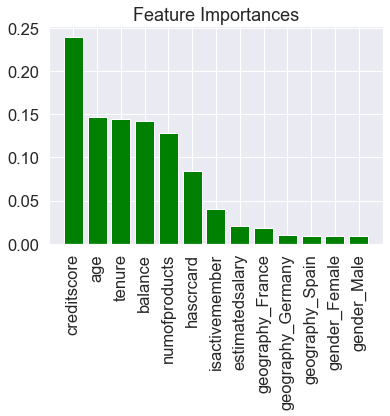

In [44]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X.shape[1]), features_label, rotation = 90)
plt.show()

## Prediction

### Selecting Machine Learning Algorithms

In [49]:
X = training_data.drop('exited', axis=1)
y = training_data.exited

In [54]:
# Splitting the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Machine Learning Algorithms

#### KNN

In [55]:
# Initialization of the KNN
knMod = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2, 
                             metric = 'minkowski', metric_params = None)
# Fitting the model with training data 
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn_acc = knMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
knn_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

#### Logistic Regression

In [57]:
# Initialization of the Logistic Regression
lrMod = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)
# Fitting the model with training data 
lrMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', solver='liblinear', verbose=2)

In [58]:
# Compute the model accuracy on the given test data and labels
lr_acc = lrMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = lrMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

#### Ada Boost Classifier

In [59]:
# Initialization of the AdaBoost model
adaMod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
# Fitting the model with training data 
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [60]:
# Compute the model accuracy on the given test data and labels
ada_acc = adaMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = adaMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

#### Gradiant Boost Classifier

In [61]:
# Initialization of the GradientBoosting model
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)
# Fitting the model with training data 
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [62]:
# Compute the model accuracy on the given test data and labels
gb_acc = gbMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
gb_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

#### Random Forest Classifier

In [63]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Fitting the model with training data 
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [64]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

In [65]:
models = ['KNN', 'Logistic Regression', 'AdaBoost', 'GradientBoosting', 'Random Forest']
accuracy = [knn_acc, lr_acc, ada_acc, gb_acc, rf_acc]
roc_auc = [knn_roc_auc, lr_roc_auc, ada_roc_auc, gb_roc_auc, rf_roc_auc]

d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,roc_auc
KNN,0.7644,0.519263
Logistic Regression,0.7876,0.679379
AdaBoost,0.8568,0.844739
GradientBoosting,0.8584,0.862981
Random Forest,0.8552,0.821160


In [66]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, knMod.predict_proba(np.array(X_test.values))[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lrMod.predict_proba(np.array(X_test.values))[:,1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, adaMod.predict_proba(np.array(X_test.values))[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])

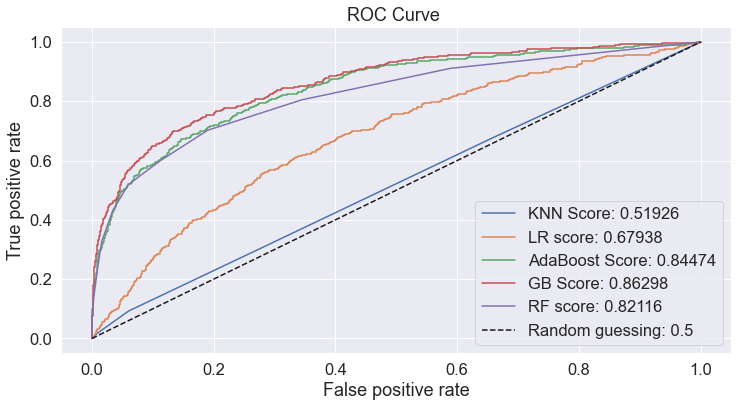

In [67]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(knn_roc_auc, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(gb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

###### As you can see in the code snippets given above, the GradientBoosting with 0.86 and the AdaBoost with 0.84 classifiers get a good ROC-AUC score on the validation dataset. Other classifiers, such as logistic regression, KNN, and RandomForest do not perform well on the validation set. From this stage onward, we will work with GradientBoosting and AdaBoost classifiers in order to improve their accuracy score.

## Artificial Neural Network

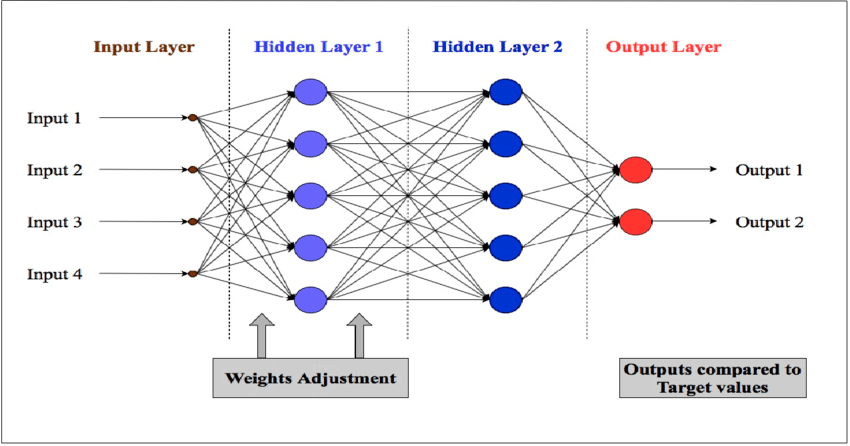

In [68]:
df = training_data.copy()

In [69]:
X = df.drop('exited', axis = 1)
y = to_categorical(df.exited)

In [70]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#### Feature Scaling

In [71]:
# Scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Initialising the ANN

In [72]:
# initializing ann
model = Sequential()

#### Building Deep layer

In [87]:
# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (13, )))

In [88]:
# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

In [89]:
# adding the second hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

In [90]:
# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

In [91]:
# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

In [92]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [94]:
# fitting the model to the training set 
model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
188/188 [==============================] - 2s 10ms/step - loss: 0.3620 - accuracy: 0.8538 - val_loss: 0.3549 - val_accuracy: 0.8540
Epoch 2/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3585 - accuracy: 0.8555 - val_loss: 0.3503 - val_accuracy: 0.8527
Epoch 3/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3612 - accuracy: 0.8520 - val_loss: 0.3466 - val_accuracy: 0.8553
Epoch 4/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3578 - accuracy: 0.8543 - val_loss: 0.3512 - val_accuracy: 0.8620
Epoch 5/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3525 - accuracy: 0.8572 - val_loss: 0.3464 - val_accuracy: 0.8593
Epoch 6/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3561 - accuracy: 0.8545 - val_loss: 0.3442 - val_accuracy: 0.8613
Epoch 7/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3596 - accuracy: 0.8513 - val_loss: 0.3477 - val_accuracy: 0.858

### Visulalising Training and Validation Lost

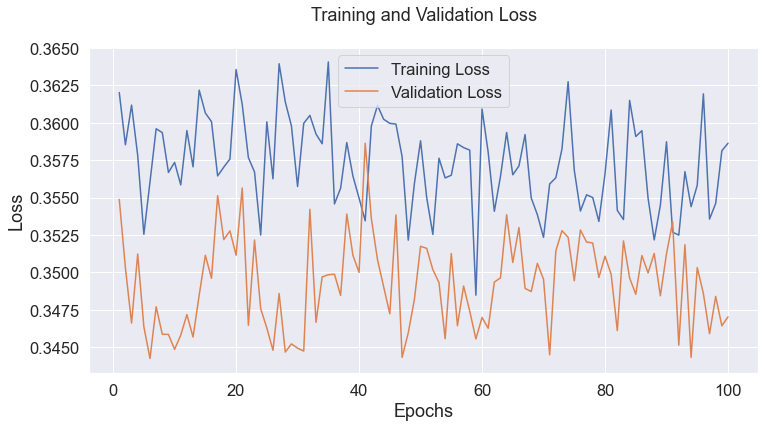

In [95]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualizing Training and Validation accuracy

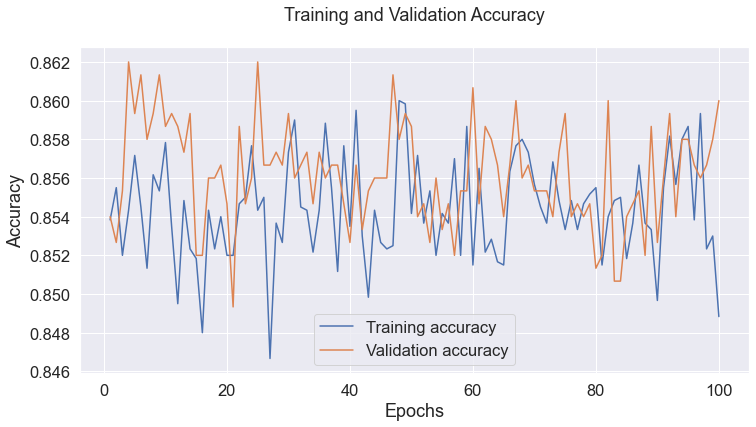

In [96]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [97]:
acc = model.evaluate(X_test, y_test)[1]
print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 0.8704
Accuracy of model is 0.8704000115394592


In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                        